## "US Housing Trends Analyzer and Influence Explorer"


#### **Build a data science models that explains how these factors impacted home prices over the last 20 years.**

#### Importing necessary libraries

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#### Reading prepared (US home prices) data into a dataframe.


In [2]:
us_house_price_df = pd.read_csv("DATA.csv").set_index("DATE")
us_house_price_df.head()

all_Const_Emp  emratio        GDP  home_ow_rate  house_st  income  \
DATE                                                                          
01/01/04          866.4     62.3  11923.447          68.7      1911  9731.8   
01/02/04          867.3     62.3  11923.447          68.7      1846  9765.4   
01/03/04          875.7     62.2  11923.447          68.7      1998  9815.8   
01/04/04          876.2     62.3  12112.815          69.4      2003  9865.8   
01/05/04          890.8     62.3  12112.815          69.4      1981  9950.0   

          IPI_Cement  labor_percent  monthly_supply   MSPUS  ...  \
DATE                                                         ...   
01/01/04    152.7696           66.1             3.8  212700  ...   
01/02/04    150.0017           66.0             3.7  212700  ...   
01/03/04    169.2698           66.0             3.6  212700  ...   
01/04/04    170.7984           65.9             4.0  217600  ...   
01/05/04    166.8784           66.0             3.8  217600  ...   

          new_private_hw_under  p_saving_rate  permit  population  PPI_Cement  \
DATE                                                                            
01/01/04                  1191            4.6    1952      292046       149.4   
01/02/04                  1197            4.6    1966      292230       149.5   
01/03/04                  1219            4.5    2066      292434       150.2   
01/04/04                  1222            4.9    2070      292651       152.1   
01/05/04                  1233            4.8    2150      292872       153.6   

          PPI_Concrete   target  total_emp_cons  unemployed_rate  \
DATE                                                               
01/01/04         154.4  140.705            6848              5.7   
01/02/04         154.4  142.028            6838              5.6   
01/03/04         154.4  144.079            6887              5.8   
01/04/04         155.6  146.180            6901              5.6   
01/05/04         155.6  148.336            6948              5.6   

          mortgage_rate  
DATE                     
01/01/04           5.87  
01/02/04           5.72  
01/03/04           5.59  
01/04/04           5.52  
01/05/04           6.12  

[5 rows x 21 columns]

In [3]:
# Dropping year and month columns
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)

KeyError: "['Year', 'Month'] not found in axis"

### Exploratory Data Analysis (EDA)


### Summary Statistics:

Calculate and display summary statistics for each variable, including mean, median, standard deviation, minimum, and maximum values. This gives you an overview of the data's central tendencies and variability.

In [4]:
# Summary statistics
summary_stats = us_house_price_df.describe()
summary_stats

all_Const_Emp     emratio           GDP  home_ow_rate     house_st  \
count     241.000000  241.000000    241.000000    241.000000   241.000000   
mean      779.371369   60.075104  18097.262676     66.078008  1227.535270   
std       139.865434    1.885306   4203.980426      1.775473   439.623996   
min       556.900000   51.200000  11923.447000     63.100000   478.000000   
25%       650.500000   58.700000  14706.538000     64.700000   917.000000   
50%       800.300000   59.900000  17197.738000     65.700000  1206.000000   
75%       910.400000   61.100000  20917.867000     67.500000  1520.000000   
max      1022.000000   63.400000  28269.174000     69.400000  2273.000000   

             income  IPI_Cement  labor_percent  monthly_supply          MSPUS  \
count    241.000000  241.000000     241.000000      241.000000     241.000000   
mean   15367.713693  111.268488      63.838174        6.345643  289071.369295   
std     3830.339043   27.515660       1.555754        1.922214   66388.593161   
min     9731.800000   66.364600      60.100000        3.300000  208400.000000   
25%    12227.800000   95.916800      62.700000        5.000000  233900.000000   
50%    14456.400000  101.787200      63.300000        5.700000  275200.000000   
75%    18053.900000  118.448000      65.800000        7.600000  322800.000000   
max    24471.800000  192.005800      66.400000       12.200000  442600.000000   

       ...  new_private_hw_under  p_saving_rate       permit     population  \
count  ...            241.000000     241.000000   241.000000     241.000000   
mean   ...           1035.912863       5.877593  1292.248963  317126.639004   
std    ...            370.771601       3.552921   463.359360   13246.504152   
min    ...            414.000000       1.400000   513.000000  292046.000000   
25%    ...            726.000000       4.100000   980.000000  306035.000000   
50%    ...           1100.000000       5.500000  1273.000000  318464.000000   
75%    ...           1268.000000       6.400000  1598.000000  329766.000000   
max    ...           1711.000000      32.000000  2263.000000  336194.000000   

       PPI_Cement  PPI_Concrete      target  total_emp_cons  unemployed_rate  \
count  241.000000    241.000000  241.000000      241.000000       241.000000   
mean   224.052465    219.883066  189.752154     6851.058091         5.882988   
std     42.557324     46.654761   48.577546      798.137606         2.102598   
min    149.400000    154.400000  133.996000     5427.000000         3.400000   
25%    194.600000    196.000000  153.815000     6109.000000         4.400000   
50%    209.100000    207.000000  176.597000     7044.000000         5.100000   
75%    251.200000    250.600000  205.362000     7523.000000         7.300000   
max    345.633000    351.033000  312.747000     8146.000000        14.800000   

       mortgage_rate  
count     241.000000  
mean        4.723112  
std         1.186151  
min         2.650000  
25%         3.800000  
50%         4.460000  
75%         5.810000  
max         7.760000  

[8 rows x 21 columns]

### Correlation Analysis:

Calculate the correlation matrix to measure the linear relationships between variables.

In [5]:
# Correlation matrix
corr_matrix = us_house_price_df.corr()
corr_matrix

all_Const_Emp   emratio       GDP  home_ow_rate  \
all_Const_Emp              1.000000  0.669709  0.194830      0.439585   
emratio                    0.669709  1.000000 -0.336260      0.466093   
GDP                        0.194830 -0.336260  1.000000     -0.551660   
home_ow_rate               0.439585  0.466093 -0.551660      1.000000   
house_st                   0.856894  0.527271  0.114124      0.333323   
income                     0.170911 -0.416432  0.987094     -0.537997   
IPI_Cement                 0.692722  0.768254 -0.485772      0.616058   
labor_percent              0.209709  0.709153 -0.815776      0.775653   
monthly_supply             0.079586  0.207041  0.057043      0.234423   
MSPUS                      0.355083 -0.209841  0.967737     -0.473874   
new_private_house          0.938274  0.671715 -0.006602      0.524352   
new_private_hw_under       0.909517  0.406120  0.539137      0.156668   
p_saving_rate             -0.256116 -0.723776  0.252612     -0.196182   
permit                     0.853292  0.487935  0.156540      0.310099   
population                -0.082354 -0.545715  0.930845     -0.762300   
PPI_Cement                 0.323431 -0.206909  0.959505     -0.430657   
PPI_Concrete               0.185047 -0.348549  0.979209     -0.447175   
target                     0.572717 -0.032170  0.892063     -0.176987   
total_emp_cons             0.939764  0.534518  0.457963      0.183888   
unemployed_rate           -0.707290 -0.630977 -0.428607      0.201184   
mortgage_rate              0.525548  0.696697 -0.246259      0.654150   

                      house_st    income  IPI_Cement  labor_percent  \
all_Const_Emp         0.856894  0.170911    0.692722       0.209709   
emratio               0.527271 -0.416432    0.768254       0.709153   
GDP                   0.114124  0.987094   -0.485772      -0.815776   
home_ow_rate          0.333323 -0.537997    0.616058       0.775653   
house_st              1.000000  0.103722    0.721688       0.095252   
income                0.103722  1.000000   -0.497102      -0.850850   
IPI_Cement            0.721688 -0.497102    1.000000       0.623669   
labor_percent         0.095252 -0.850850    0.623669       1.000000   
monthly_supply       -0.365388  0.020320   -0.152251       0.285530   
MSPUS                 0.296454  0.949155   -0.312240      -0.761280   
new_private_house     0.918096 -0.021775    0.796831       0.312731   
new_private_hw_under  0.811322  0.514533    0.411675      -0.158040   
p_saving_rate        -0.167322  0.391716   -0.372081      -0.542189   
permit                0.985284  0.148744    0.686431       0.047110   
population           -0.100267  0.941002   -0.648980      -0.935993   
PPI_Cement            0.132556  0.942644   -0.396553      -0.685335   
PPI_Concrete          0.053959  0.967843   -0.518518      -0.750128   
target                0.430164  0.872675   -0.134632      -0.547616   
total_emp_cons        0.743547  0.434324    0.469353      -0.038446   
unemployed_rate      -0.628204 -0.351953   -0.384663       0.098726   
mortgage_rate         0.262653 -0.317695    0.510852       0.672438   

                      monthly_supply     MSPUS  ...  new_private_hw_under  \
all_Const_Emp               0.079586  0.355083  ...              0.909517   
emratio                     0.207041 -0.209841  ...              0.406120   
GDP                         0.057043  0.967737  ...              0.539137   
home_ow_rate                0.234423 -0.473874  ...              0.156668   
house_st                   -0.365388  0.296454  ...              0.811322   
income                      0.020320  0.949155  ...              0.514533   
IPI_Cement                 -0.152251 -0.312240  ...              0.411675   
labor_percent               0.285530 -0.761280  ...             -0.158040   
monthly_supply              1.000000  0.012411  ...              0.030234   
MSPUS                       0.012411  1.000000  ...              0.681708   
new_p

Visualize the correlation matrix using a heatmap to identify strong positive and negative correlations.

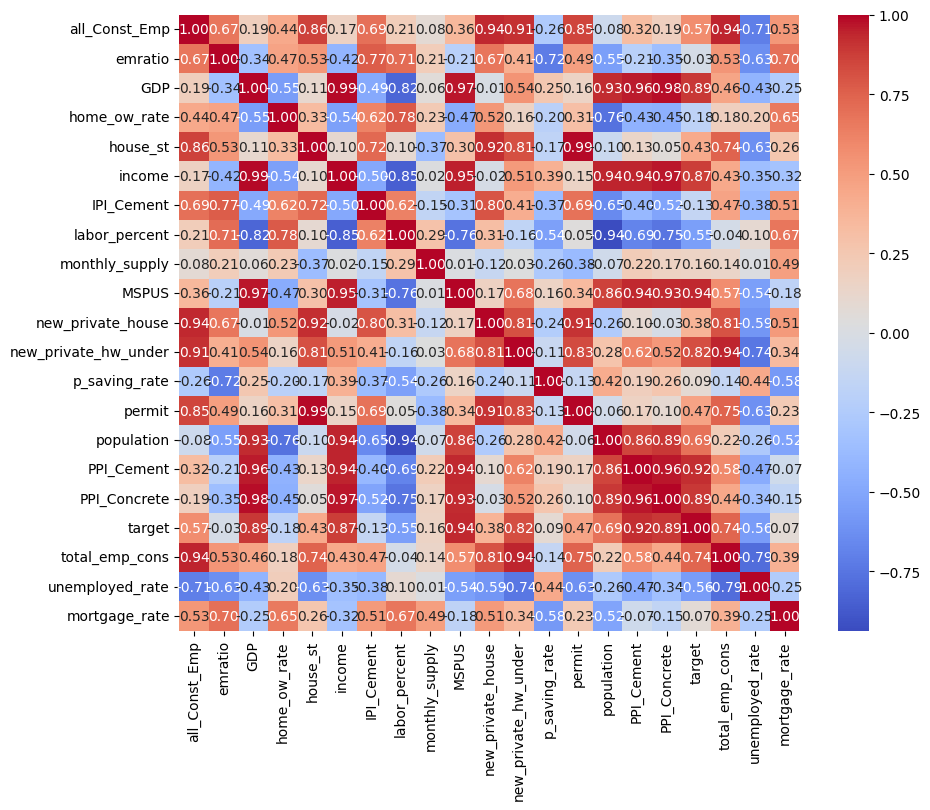

In [6]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Time Series Analysis:

For time-dependent variables like 'CSUSHPISA,' use time series decomposition to separate trends, seasonality, and residuals. Plot these components to understand the patterns over time.

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(us_house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()


KeyError: 'CSUSHPISA'

The trend component represents the overall trend in home prices.

The seasonal component captures any recurring patterns or seasonality.

The residual component accounts for the remaining variability in the data.

### Data Visualization:

Visualize the data using various plots and graphs to understand its distribution and trends.

**Pairplot for visualizing relationships**

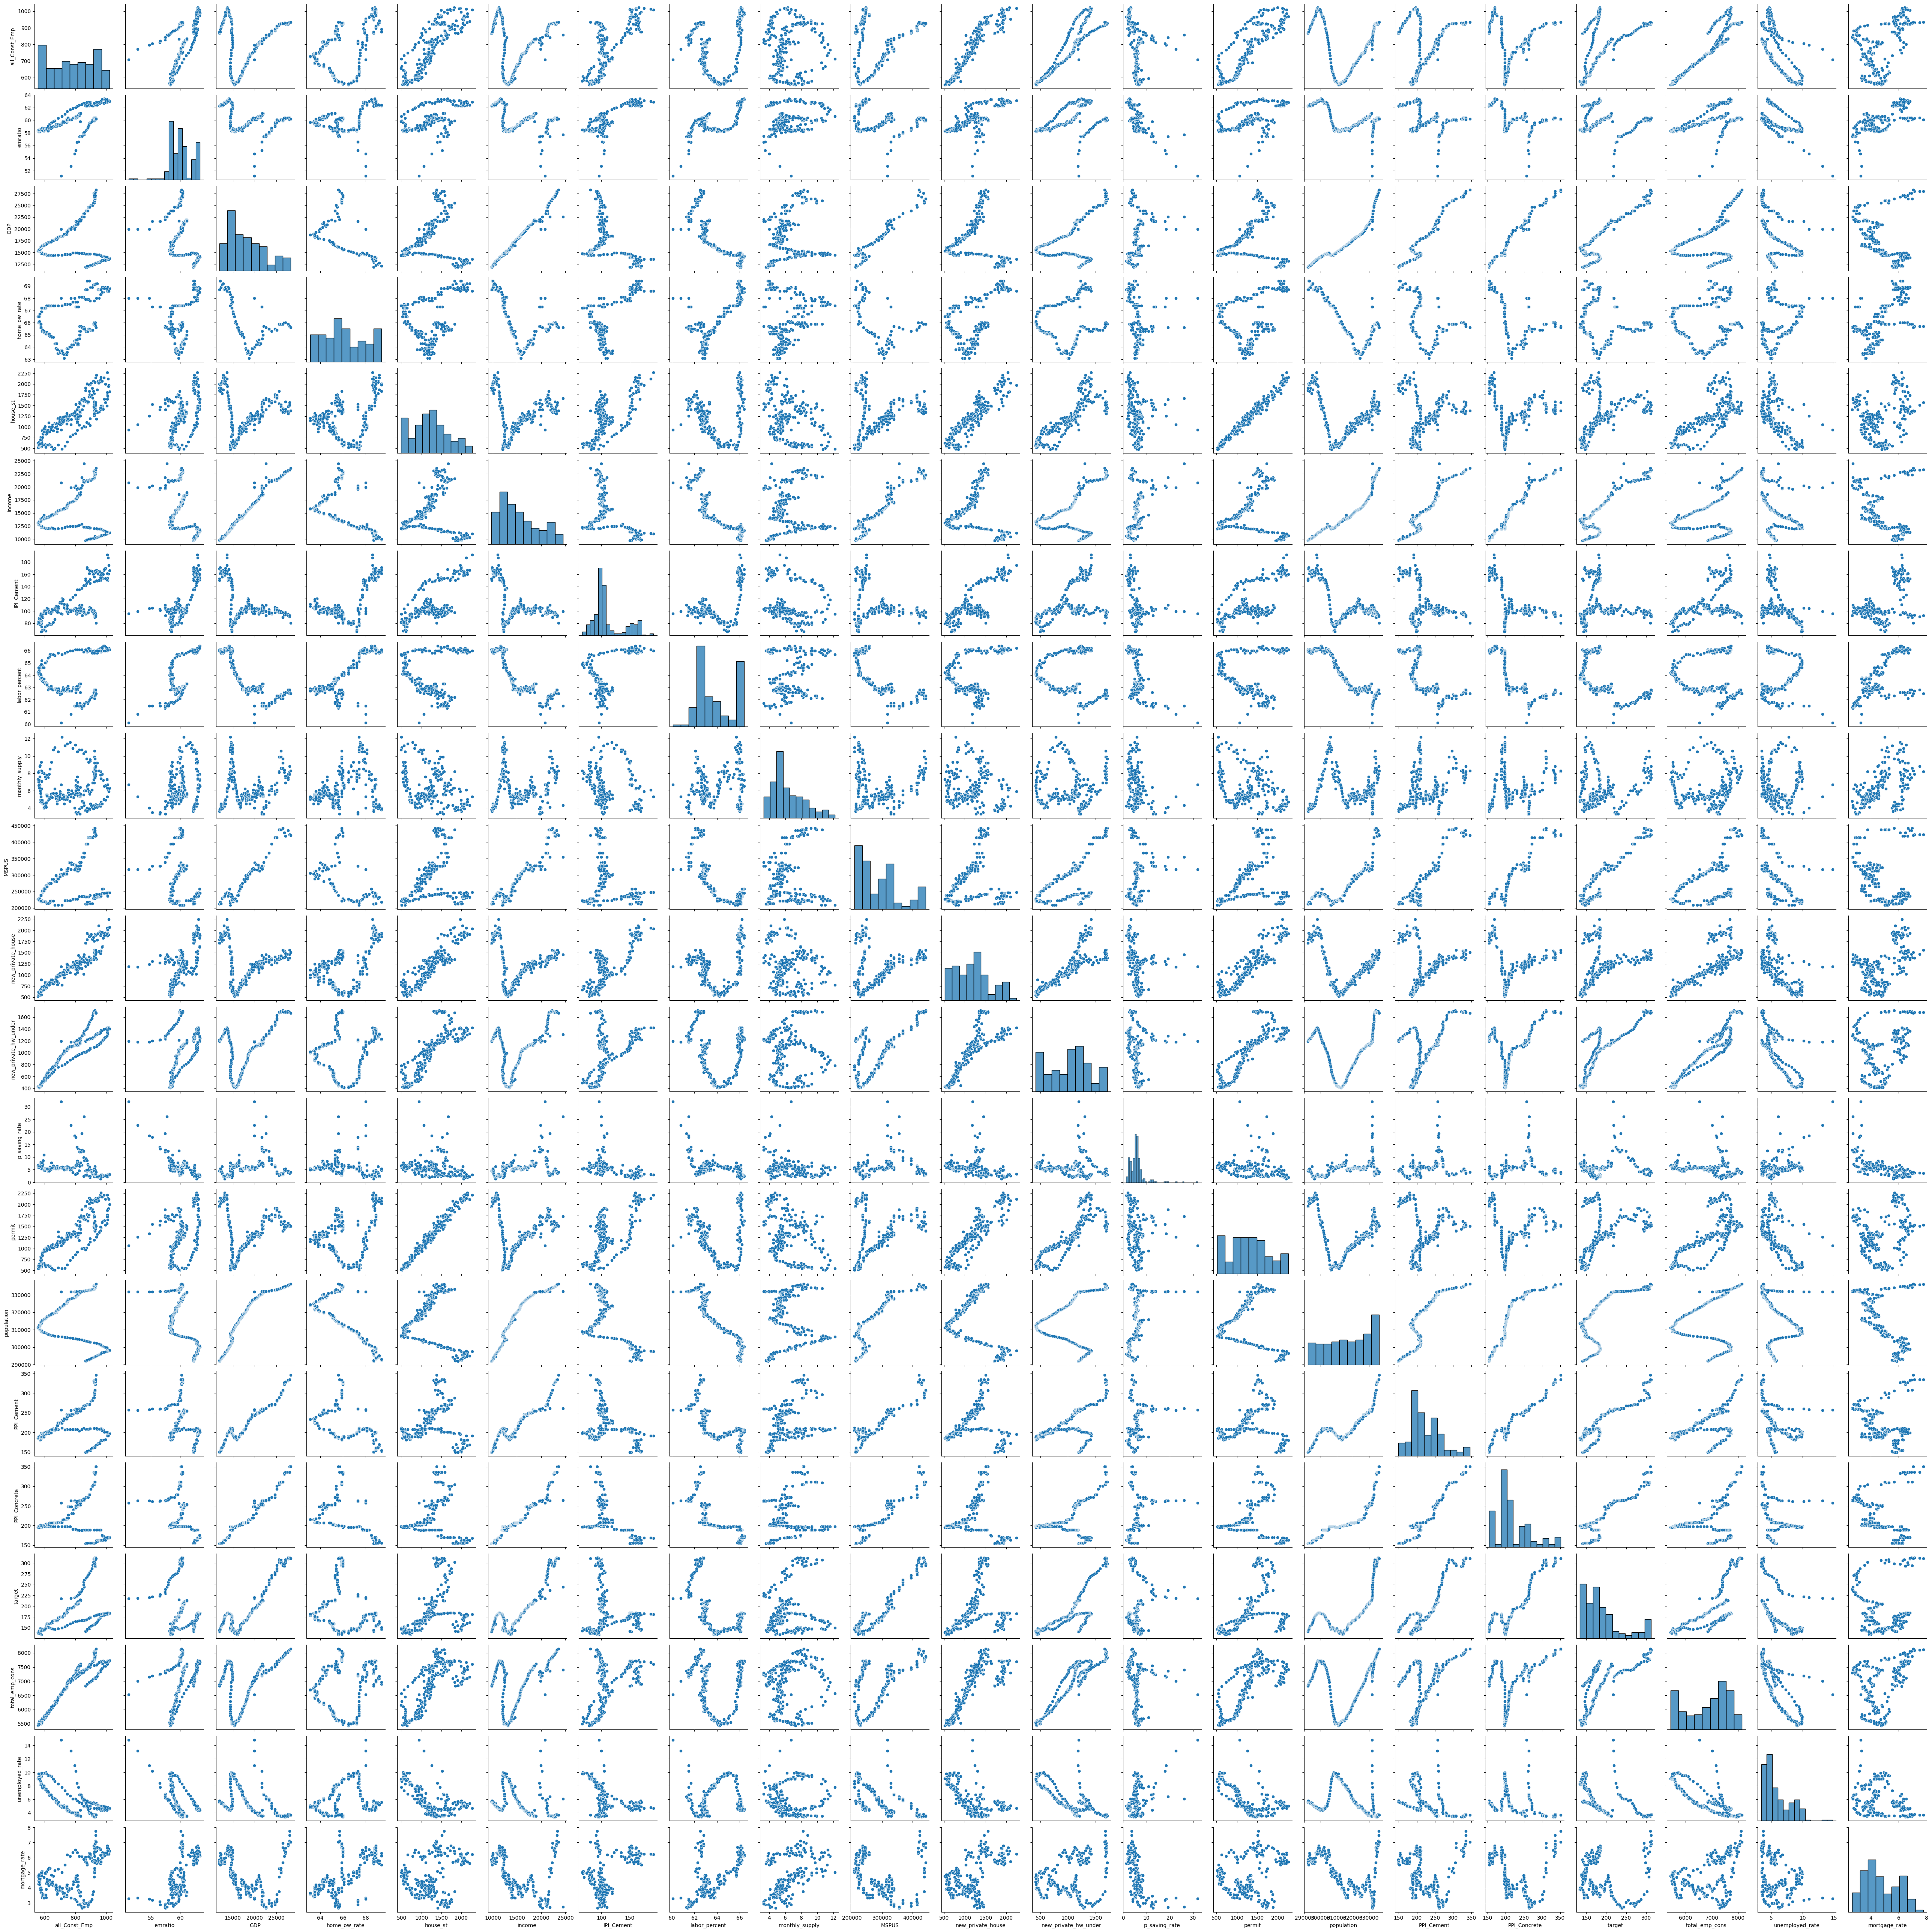

In [8]:
sns.pairplot(us_house_price_df)

In [9]:
us_house_price_df.columns

Index(['CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop', 'Houses', 'CPI',
       'UNRATE', 'EmpRate', 'Cons_Material', 'FEDFUNDS', 'urban_pop_us',
       'Num_Households', 'median_income', 'Subsidy', 'old_age_pop'],
      dtype='object')

In [10]:
factors = ['CSUSHPISA', 'UNRATE', 'Per_Capita_GDP', 'FEDFUNDS', 'Cons_Material', 'CPI', 'Houses', 'Num_Households', 'old_age_pop', 'urban_pop_us', 'Subsidy', 'working_age_pop', 'median_income']

**Histograms and Kernel Density Plots**

<Figure size 1300x800 with 0 Axes>

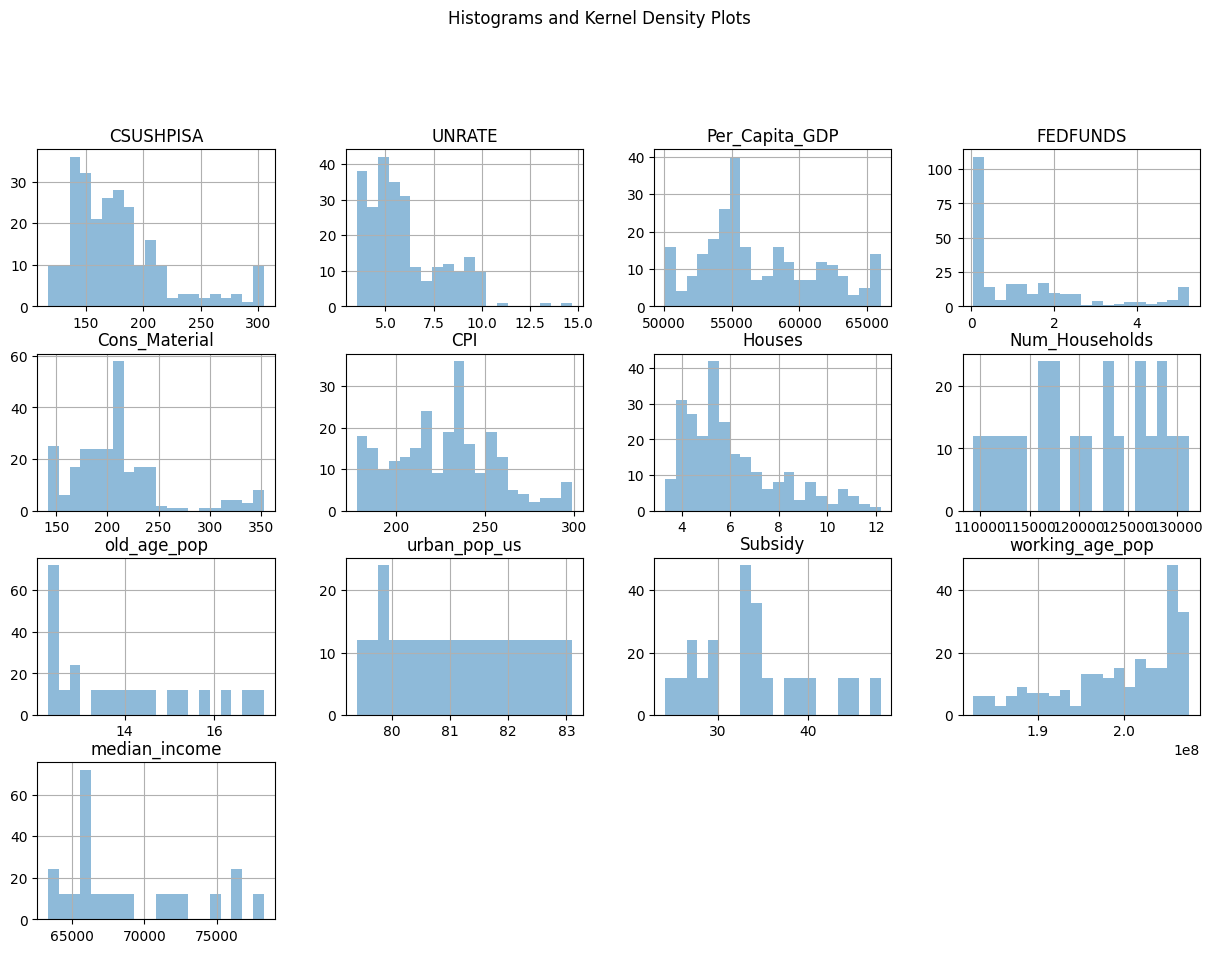

In [11]:
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

**Violin Plots:**

Generates violin plots to visualize the distribution and density of each factor.

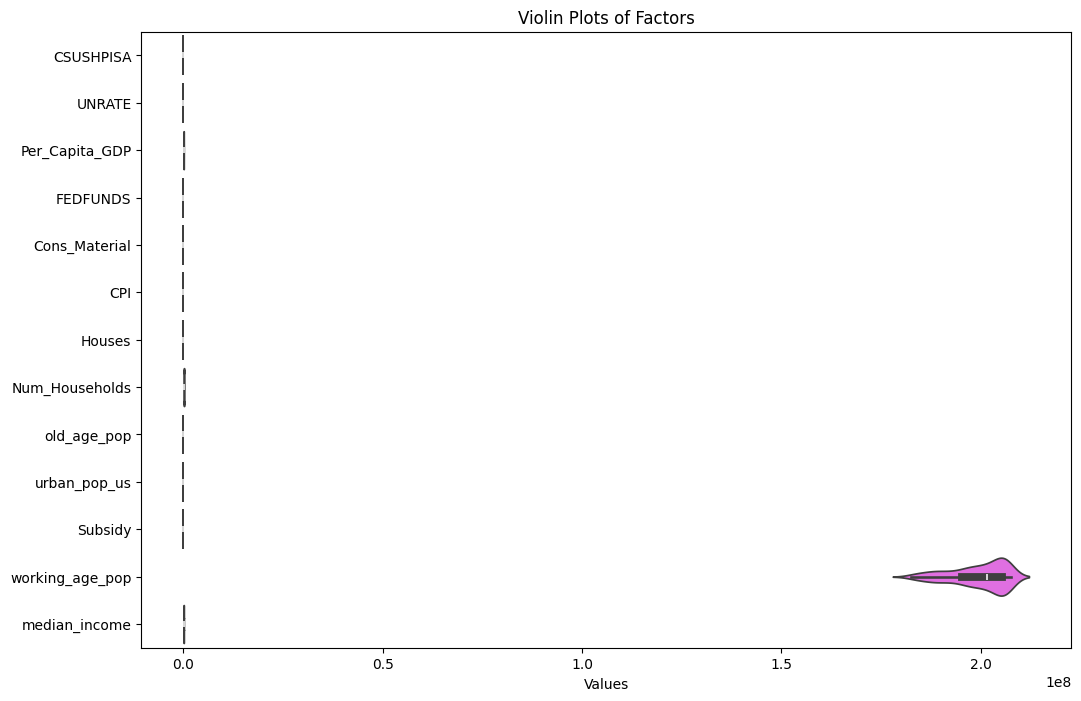

In [12]:
# Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=us_house_price_df[factors], orient='h')
plt.title('Violin Plots of Factors')
plt.xlabel('Values')
plt.show()

#### Extract features and target

In [13]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

**Plotting scatter plots of the CASE-SHILLER index vs features**

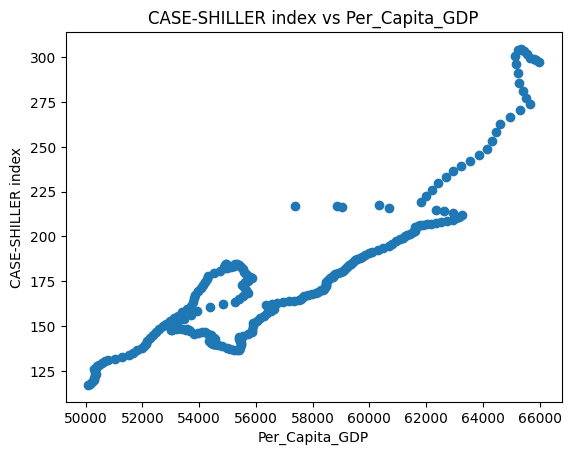

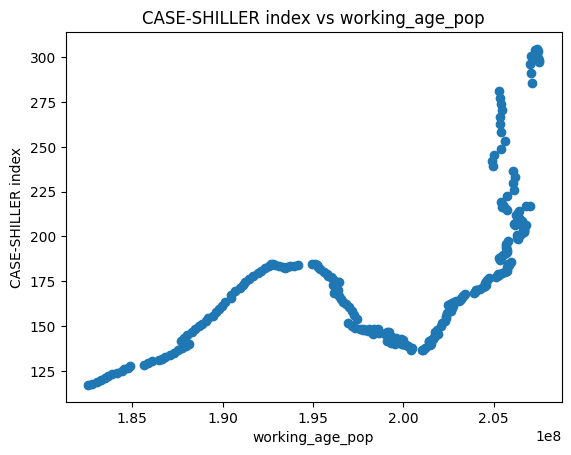

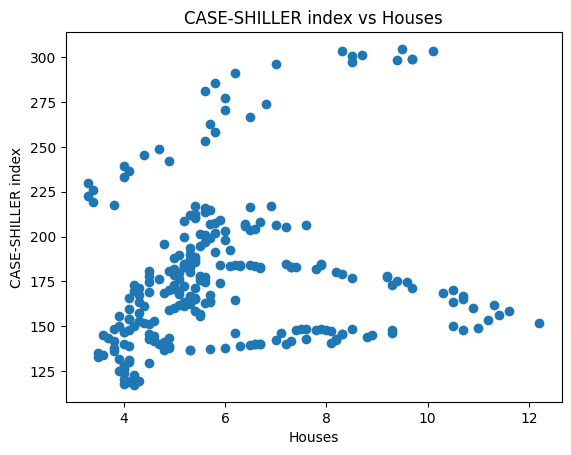

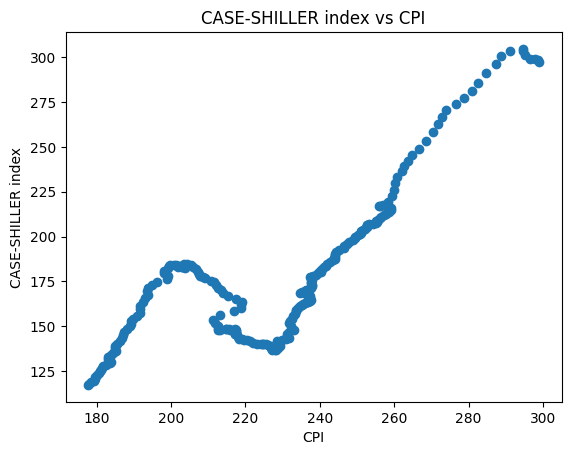

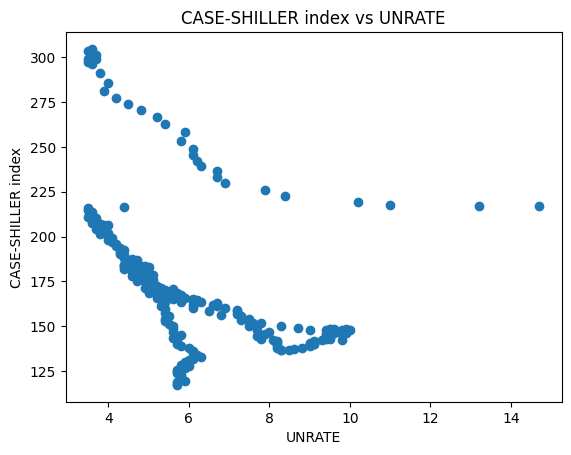

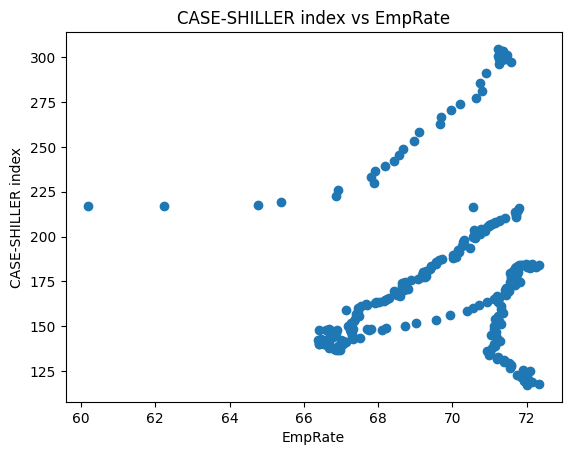

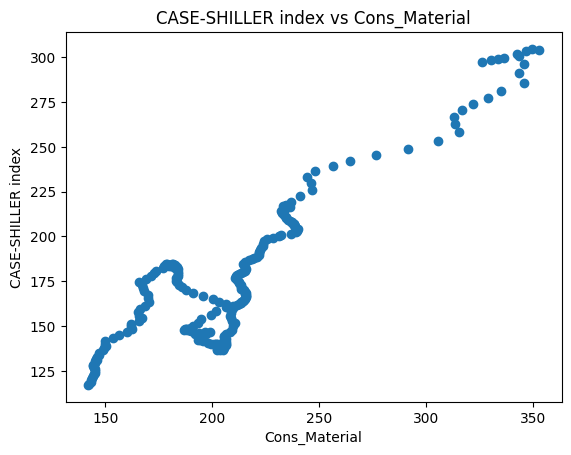

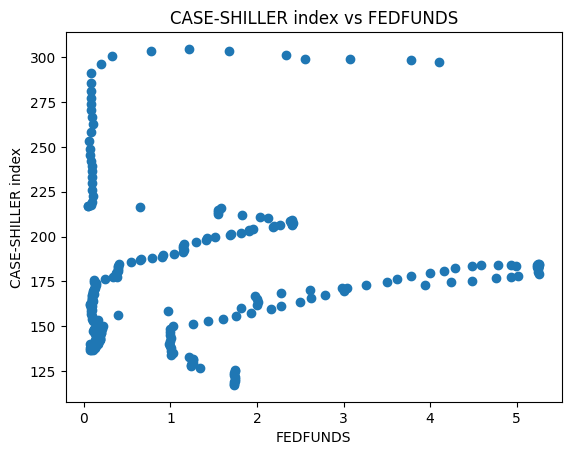

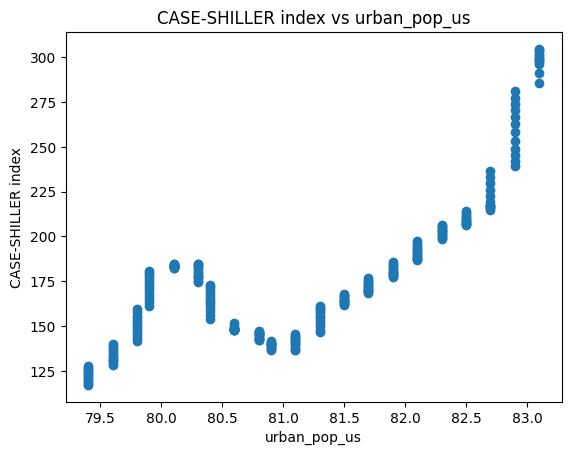

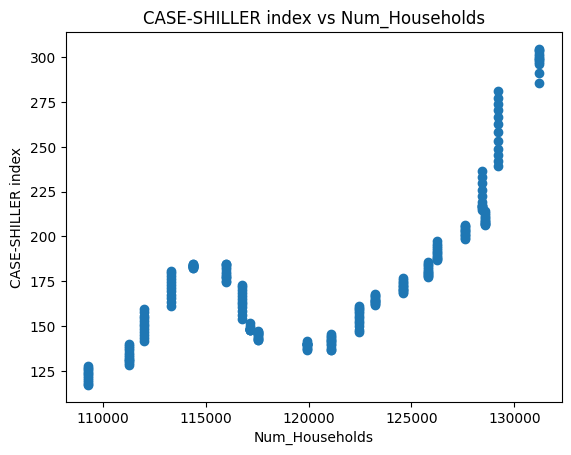

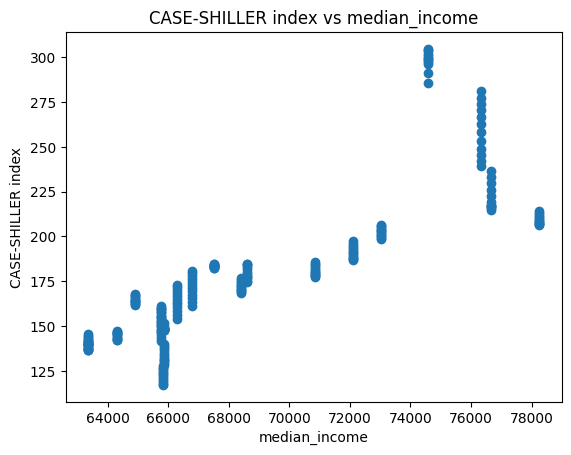

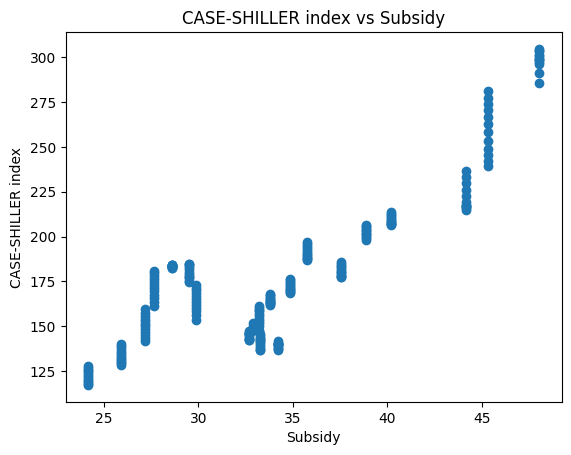

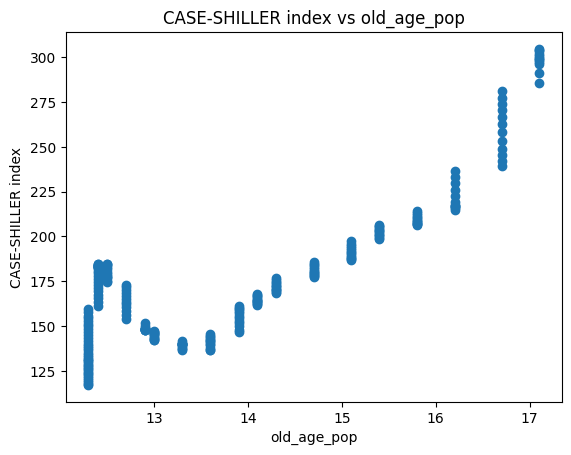

In [14]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

#### Calculate correlation coefficients

In [15]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
FEDFUNDS           0.113791
Houses             0.177683
EmpRate            0.199060
UNRATE             0.475602
working_age_pop    0.619826
Num_Households     0.748972
urban_pop_us       0.788002
CPI                0.822250
median_income      0.831509
old_age_pop        0.842396
Subsidy            0.845065
Cons_Material      0.898972
Per_Capita_GDP     0.904325
dtype: float64


Based on the provided correlation coefficients:


**Highest Correlation:**

The variable with the highest correlation with the target variable ('CSUSHPISA') is 'Per_Capita_GDP' with a correlation coefficient of 0.904325. This feature shows a strong positive linear relationship with home prices.

**Other Strong Correlations:**

'Cons_Material' (0.898972), 'Subsidy' (0.845065), 'old_age_pop' (0.842396), 'median_income' (0.831509), and 'CPI' (0.822250) also have strong positive correlations.

**Moderate Correlations:**

'urban_pop_us' (0.788002), 'Num_Households' (0.748972), and 'working_age_pop' (0.619826) have moderate positive correlations.


**Lower Correlations:**

'UNRATE' (0.475602), 'EmpRate' (0.199060), 'Houses' (0.177683), and 'FEDFUNDS' (0.113791) have lower correlations.

### Data science models

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

We will drop the columns which has lower correlation with the target.

In [17]:
mult_cols = ["working_age_pop", "Houses", "urban_pop_us", "Num_Households", "UNRATE", "EmpRate", "FEDFUNDS"]
us_house_price_df.drop(columns = mult_cols, inplace = True)
X = us_house_price_df

In [18]:
X

Per_Capita_GDP      CPI  Cons_Material  median_income  Subsidy  \
DATE                                                                         
2002-01-01    50091.000000  177.700        142.000        65820.0   24.183   
2002-02-01    50156.000000  178.000        142.200        65820.0   24.183   
2002-03-01    50221.000000  178.500        143.200        65820.0   24.183   
2002-04-01    50286.000000  179.300        143.500        65820.0   24.183   
2002-05-01    50311.333333  179.500        143.800        65820.0   24.183   
...                    ...      ...            ...            ...      ...   
2022-08-01    65569.000000  295.320        342.753        74580.0   48.021   
2022-09-01    65676.000000  296.539        336.464        74580.0   48.021   
2022-10-01    65783.000000  297.987        333.796        74580.0   48.021   
2022-11-01    65881.333333  298.598        330.369        74580.0   48.021   
2022-12-01    65979.666667  298.990        326.449        74580.0   48.021   

            old_age_pop  
DATE                     
2002-01-01         12.3  
2002-02-01         12.3  
2002-03-01         12.3  
2002-04-01         12.3  
2002-05-01         12.3  
...                 ...  
2022-08-01         17.1  
2022-09-01         17.1  
2022-10-01         17.1  
2022-11-01         17.1  
2022-12-01         17.1  

[252 rows x 6 columns]

### Models building

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Explored various regression models, including Linear Regression, ElasticNet, Random Forest, Gradient Boosting, Support Vector Regression (SVR), and XGBoost.


In [21]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 84.64814623224495
R-squared: 0.9312617308349811
Coefficients:
Per_Capita_GDP: 27.96103493918062
CPI: -30.941309443400623
Cons_Material: 45.43791649294705
median_income: 15.863188960034268
Subsidy: 7.375676661598739
old_age_pop: -22.371173130551828
Intercept: 180.01736815920398

Model: ElasticNet
Mean Squared Error: 205.66906295596957
R-squared: 0.8329870642459584
Coefficients:
Per_Capita_GDP: 7.970593920513977
CPI: 3.016834702631743
Cons_Material: 10.522743035061312
median_income: 8.934671476766292
Subsidy: 4.102514429313639
old_age_pop: 3.0107776524483127
Intercept: 180.01736815920395

Model: Random Forest
Mean Squared Error: 2.204430526599979
R-squared: 0.9982098989093362
Feature Importance Analysis:
Per_Capita_GDP: 0.06511646904970599
CPI: 0.3951274724312747
Cons_Material: 0.2704800567684393
median_income: 0.17032377467413534
Subsidy: 0.0327033139204639
old_age_pop: 0.06624891315598076

Model: Gradient Boosting
Mean Squared Error: 4.81065

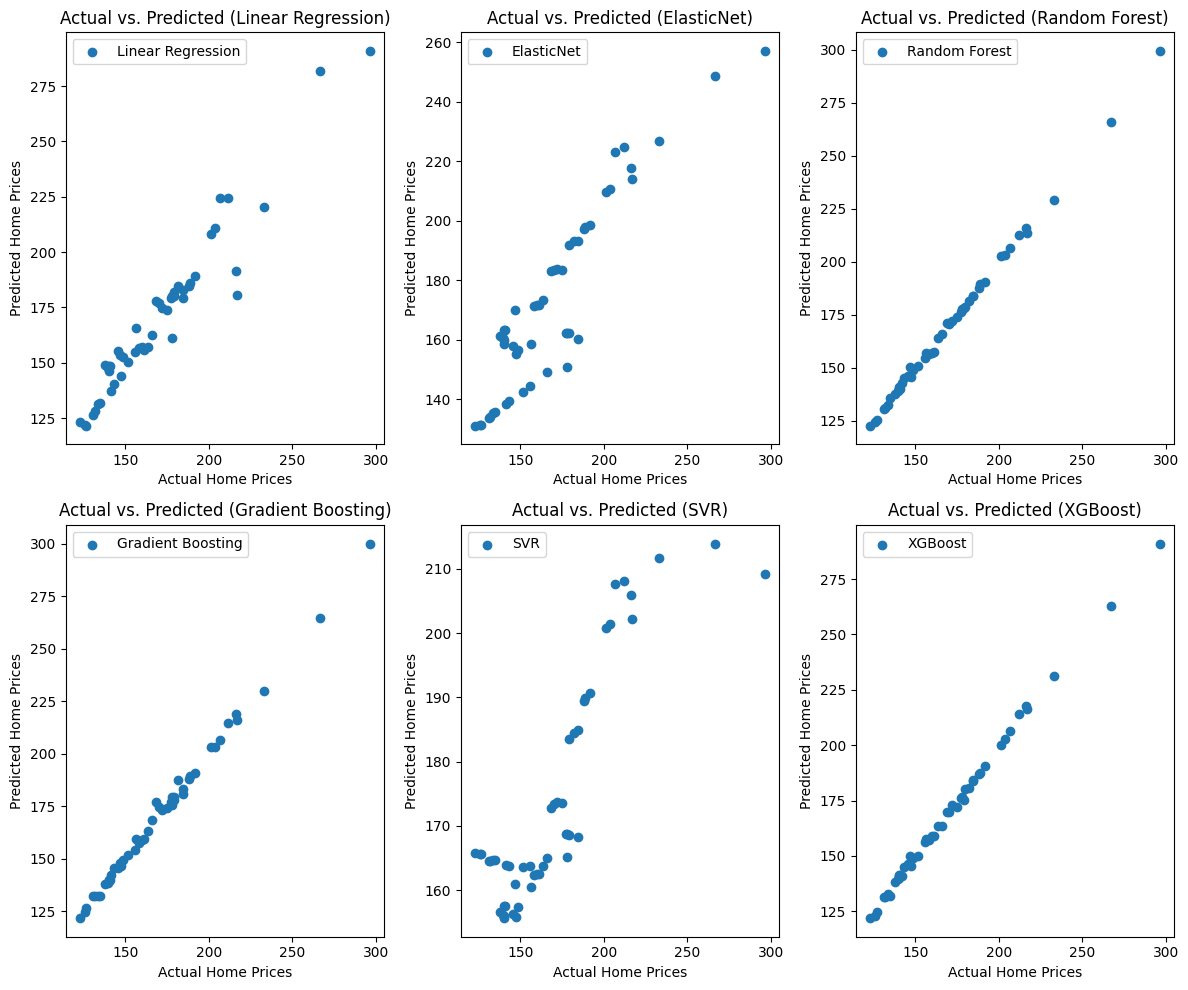


Best Model: RandomForestRegressor with MSE: 2.204430526599979


In [22]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

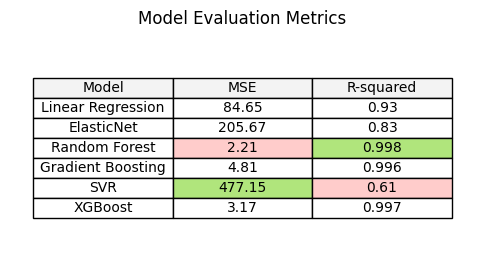

In [23]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    'R-squared': [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()


**Decision:**

**Random Forest and XGBoost** appear to be strong contenders, as they have low MSE and high R-squared values. Additionally, both models provide insights into feature importance.

**Gradient Boosting** also performs well but with a slightly higher MSE compared to Random Forest and XGBoost.

**Linear Regression and ElasticNet** have higher MSE values, indicating potential limitations in predictive accuracy.

**SVR** has a considerably higher MSE and lower R-squared, suggesting lower performance compared to other models.

**Champion model:** 
In summary, based on the provided metrics, **Random Forest** appear to be a **strong candidate** for the best model, with a low MSE and a high R-squared value.


**Low MSE:** The low MSE indicates that the model's predictions are close to the actual values on average, suggesting good predictive accuracy.


**High R-squared:** The high R-squared value suggests that a significant portion of the variance in home prices is explained by the model. This indicates strong explanatory power.


**Feature Importance:** The feature importance analysis provides transparency into the factors driving the predictions. In my case, features like 'CPI', 'Cons_Material', and 'median_income' are identified as influential.

This means that, according to the model, changes in these features have a notable impact on the predictions of U.S. home prices. For example, if 'CPI' increases, it suggests that changes in the cost of living might influence home prices.

Understanding feature importance is crucial for making informed decisions, refining models, and gaining insights into the factors driving the predictions, which is especially valuable in fields like economics, finance, or real estate where interpretability is essential.


